# VGG16 - Model

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Give dataset path
train_path = '/content/drive/MyDrive/archive-3/train'
test_path = '/content/drive/MyDrive/archive-3/test'

Working with 200 images
Image examples: 
test_polyps_ (108).jpg


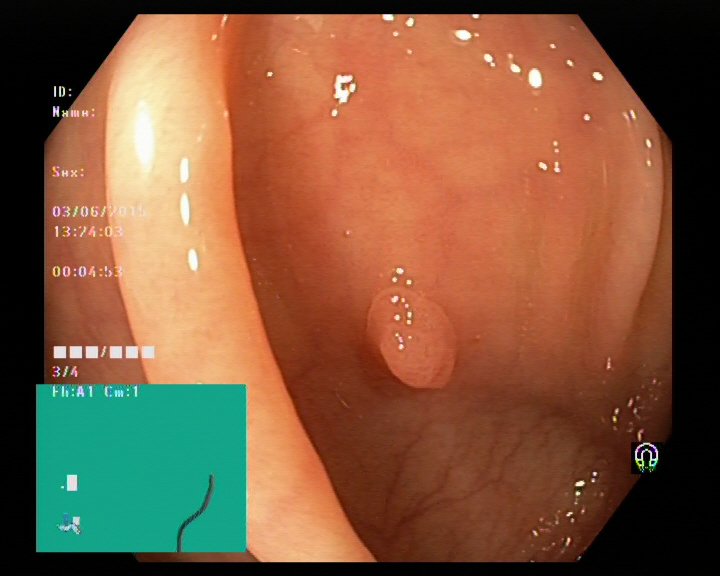

test_polyps_ (154).jpg


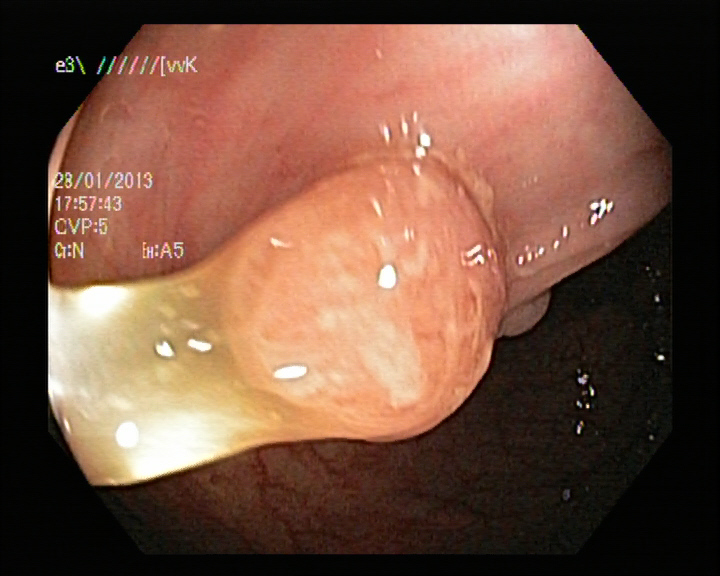

test_polyps_ (131).jpg


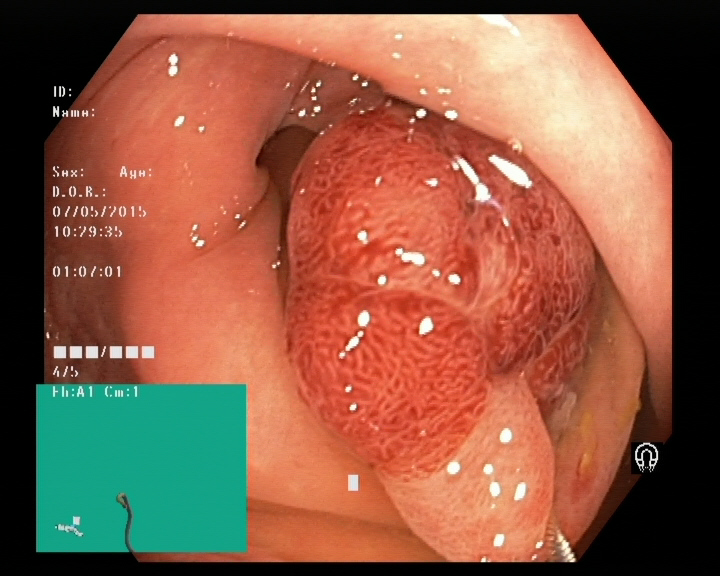

test_polyps_ (112).jpg


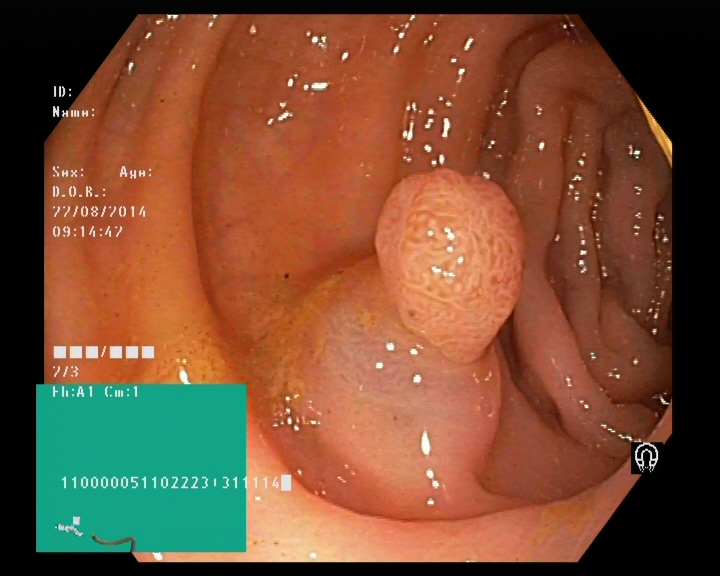

test_polyps_ (126).jpg


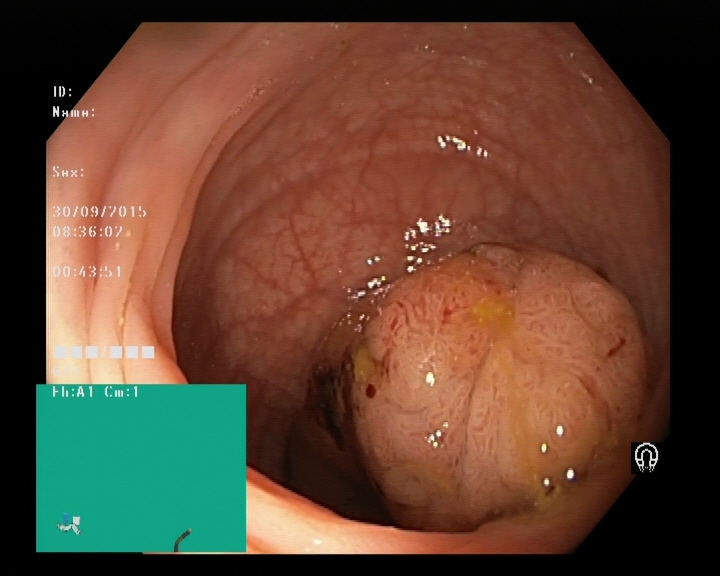

test_polyps_ (132).jpg


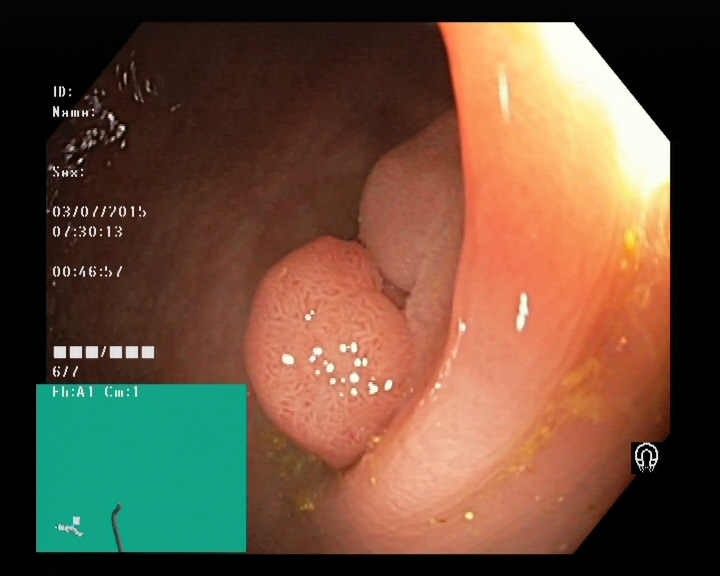

test_polyps_ (116).jpg


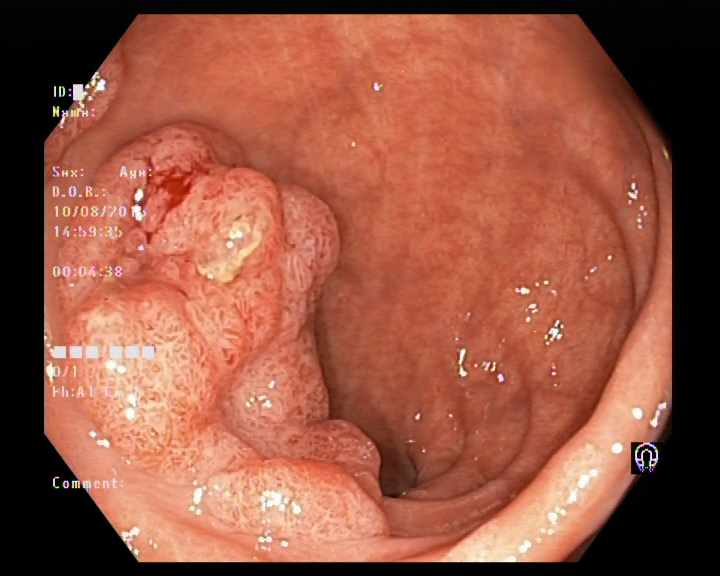

test_polyps_ (106).jpg


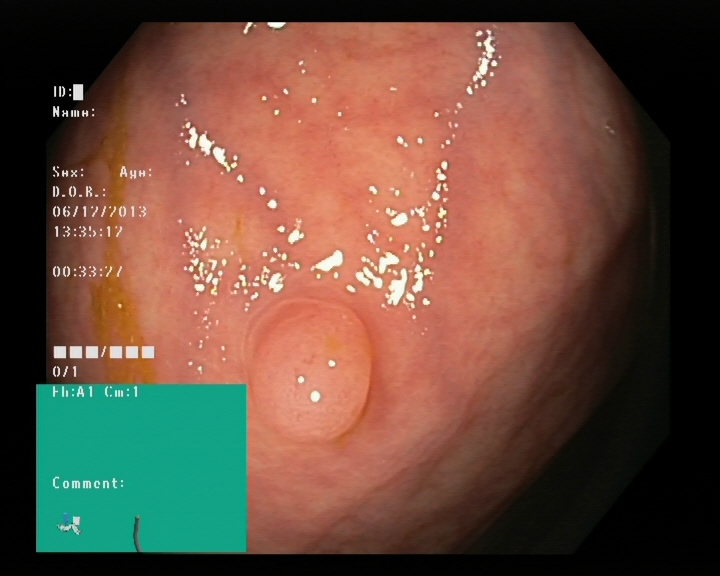

test_polyps_ (123).jpg


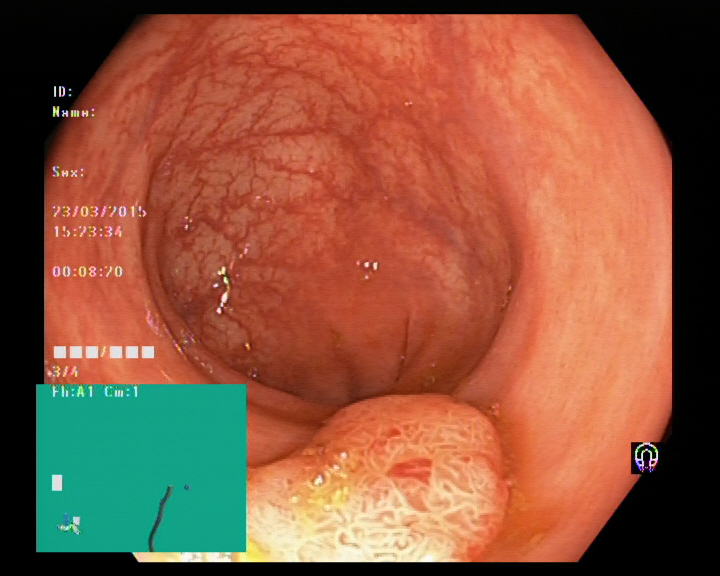

test_polyps_ (159).jpg


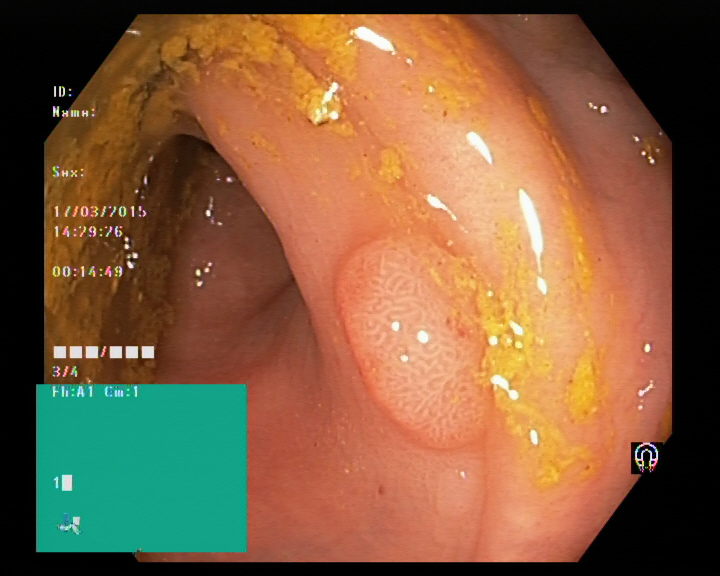

In [6]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = '/content/drive/MyDrive/archive-3/test/2_polyps'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [8]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [13]:
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3200 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [19]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-19-4a1a319319e3>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10



Epoch 1: val_loss improved from inf to 3.45190, saving model to mymodel.h5
5/5 - 386s - loss: 3.7802 - accuracy: 0.4250 - val_loss: 3.4519 - val_accuracy: 0.5362 - 386s/epoch - 77s/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10


5/5 - 59s - loss: 2.2319 - accuracy: 0.7500 - 59s/epoch - 12s/step
Epoch 3/10


5/5 - 48s - loss: 1.2871 - accuracy: 0.8500 - 48s/epoch - 10s/step
Epoch 4/10


5/5 - 50s - loss: 0.9623 - accuracy: 0.9062 - 50s/epoch - 10s/step
Epoch 5/10


5/5 - 47s - loss: 0.5920 - accuracy: 0.9187 - 47s/epoch - 9s/step
Epoch 6/10


5/5 - 48s - loss: 0.6190 - accuracy: 0.9312 - 48s/epoch - 10s/step
Epoch 7/10


5/5 - 41s - loss: 0.5231 - accuracy: 0.9438 - 41s/epoch - 8s/step
Epoch 8/10


5/5 - 39s - loss: 0.5330 - accuracy: 0.9625 - 39s/epoch - 8s/step
Epoch 9/10


5/5 - 38s - loss: 0.8309 - accuracy: 0.9375 - 38s/epoch - 8s/step
Epoch 10/10


5/5 - 40s - loss: 0.7209 - accuracy: 0.9250 - 40s/epoch - 8s/step
Training completed in time:  0:16:27.254624


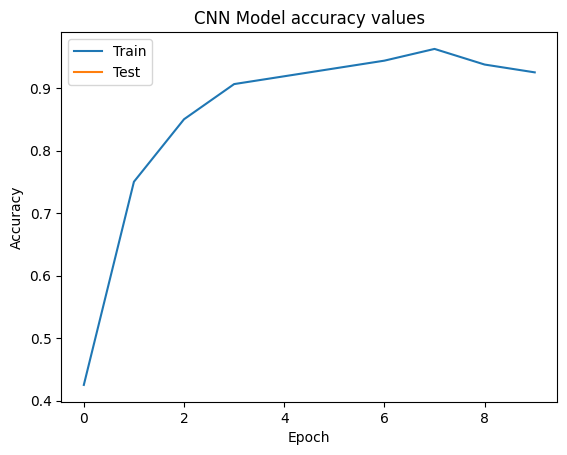

In [20]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [23]:
model.evaluate(test_set)

25/25 [==============================] - 20s 789ms/step - loss: 1.2494 - accuracy: 0.8575


[1.2494081258773804, 0.8575000166893005]

1/1 [==============================] - 1s 1s/step
[[0.0000000e+00 3.3965572e-38 9.9869955e-01 1.3003999e-03]]
THE UPLOADED IMAGE SEEMS TO BE: Polyp


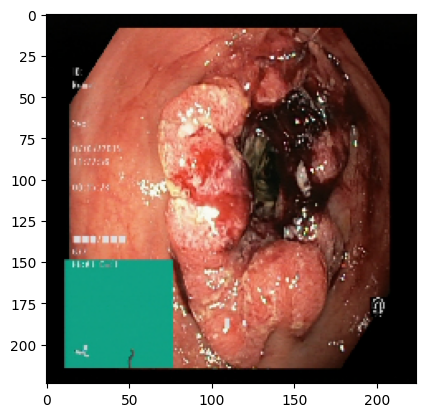

In [24]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Gastrovision-2/Colorectal cancer/02c18e5f-6c77-4104-bff2-238f587b1c28.jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))

1/1 [==============================] - 0s 19ms/step
[[1.0000000e+00 3.9831358e-36 0.0000000e+00 2.1416288e-14]]
THE UPLOADED IMAGE SEEMS TO BE: Normal


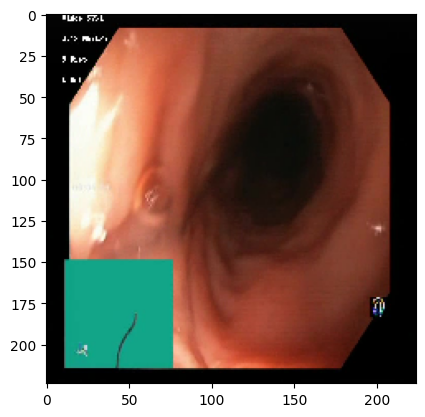

In [25]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive-3/test/0_normal/test_normal_ (112).jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))

1/1 [==============================] - 0s 20ms/step
[[3.2544107e-31 3.7680059e-37 5.2295655e-21 1.0000000e+00]]
THE UPLOADED IMAGE SEEMS TO BE: Esophagitis


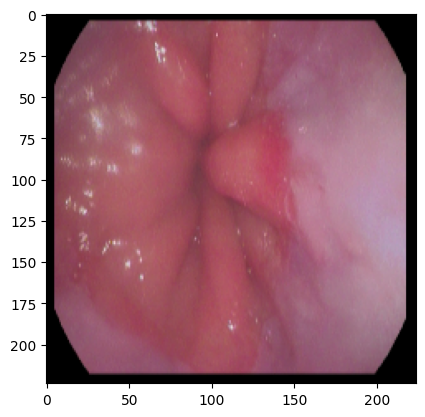

In [26]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Gastrovision-2/Esophagitis/0ad8f762-0fa6-46fd-b98d-a1b401f5ca5c.jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))